In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read datasets
folder_path = "OGcsvs/"

gen9_abilities = pd.read_csv(folder_path + 'gen9_pokemon_abilities.csv', encoding='ISO-8859-1')
gen9_moves = pd.read_csv(folder_path + 'gen9_pokemon_moves.csv', encoding='ISO-8859-1')
gen9_stats = pd.read_csv(folder_path + 'gen9_pokemon_stats.csv', encoding='ISO-8859-1')

pokedex_0520 = pd.read_csv(folder_path + 'pokedex_(Update_05.20).csv', encoding='ISO-8859-1')

In [3]:
# Print column names for each dataset
print("Column names for Generation 9 Abilities:")
print(gen9_abilities.columns.tolist())

print("\nColumn names for Generation 9 Moves:")
print(gen9_moves.columns.tolist())

print("\nColumn names for Generation 9 Stats:")
print(gen9_stats.columns.tolist())

print("\nColumn names for Pokedex (Update 05.20):")
print(pokedex_0520.columns.tolist())

Column names for Generation 9 Abilities:
['Ability', 'Pokemon', "Game's Text", 'In-Depth Effect', 'Ability URL']

Column names for Generation 9 Moves:
['Move', 'Type', 'Category', 'Power Points', 'Base Power', 'Accuracy', 'Battle Effect', 'Secondary Effect', 'Secondary Rate', 'Critical Rate', 'Speed Priority', 'Attack URL', 'Pokemon']

Column names for Generation 9 Stats:
['Pokemon', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Weakness-Normal', 'Weakness-Fire', 'Weakness-Water', 'Weakness-Electric', 'Weakness-Grass', 'Weakness-Ice', 'Weakness-Fighting', 'Weakness-Poison', 'Weakness-Ground', 'Weakness-Flying', 'Weakness-Psychic', 'Weakness-Bug', 'Weakness-Rock', 'Weakness-Ghost', 'Weakness-Dragon', 'Weakness-Dark', 'Weakness-Steel', 'Weakness-Fairy']

Column names for Pokedex (Update 05.20):
['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name', 'generation', 'status', 'species', 'type_number', 'type_1', 'type_2', 'heig

Vizualiazations

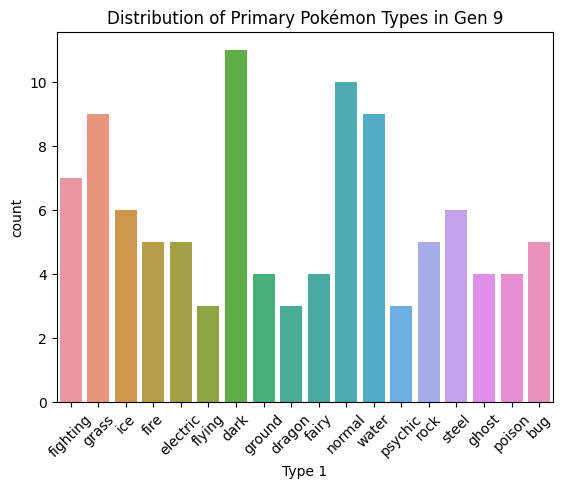

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Pokémon Types (from Generation 9 Stats)
sns.countplot(data=gen9_stats, x='Type 1')
plt.title('Distribution of Primary Pokémon Types in Gen 9')
plt.xticks(rotation=45)
plt.show()

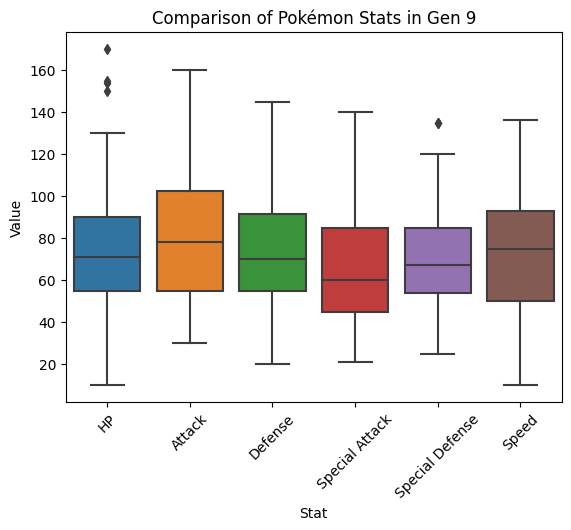

In [5]:
#Comparison of Average Stats (from Generation 9 Stats)
stats_columns = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
melted_stats = gen9_stats.melt(value_vars=stats_columns, var_name='Stat', value_name='Value')

sns.boxplot(data=melted_stats, x='Stat', y='Value')
plt.title('Comparison of Pokémon Stats in Gen 9')
plt.xticks(rotation=45)
plt.show()


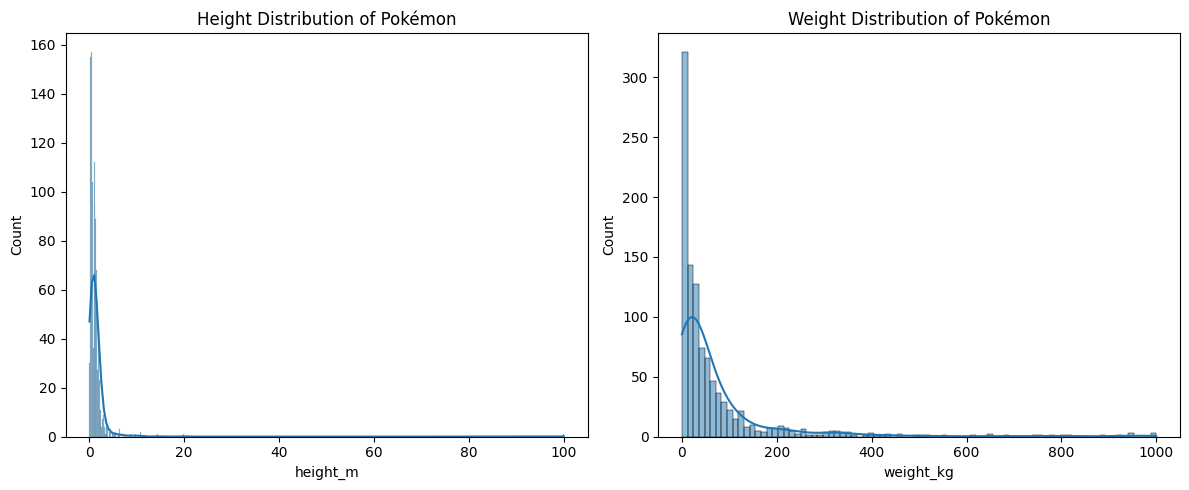

In [6]:
#Height and Weight Distribution (from Pokedex)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(pokedex_0520['height_m'], kde=True)
plt.title('Height Distribution of Pokémon')

plt.subplot(1, 2, 2)
sns.histplot(pokedex_0520['weight_kg'], kde=True)
plt.title('Weight Distribution of Pokémon')

plt.tight_layout()
plt.show()


Pre-processing (the FUN part)

In [7]:
#Check missing values for first 3 data sets
print("Missing values in Generation 9 Abilities:")
print(gen9_abilities.isnull().sum())

print("Missing values in Generation 9 Moves:")
print(gen9_moves.isnull().sum())

print("Missing values in Generation 9 Stats:")
print(gen9_stats.isnull().sum())

Missing values in Generation 9 Abilities:
Ability             0
Pokemon             0
Game's Text         0
In-Depth Effect    42
Ability URL         0
dtype: int64
Missing values in Generation 9 Moves:
Move                0
Type                0
Category            0
Power Points        0
Base Power          0
Accuracy            0
Battle Effect       0
Secondary Effect    0
Secondary Rate      0
Critical Rate       0
Speed Priority      0
Attack URL          0
Pokemon             0
dtype: int64
Missing values in Generation 9 Stats:
Pokemon               0
Type 1                0
Type 2               41
HP                    0
Attack                0
Defense               0
Special Attack        0
Special Defense       0
Speed                 0
Weakness-Normal       0
Weakness-Fire         0
Weakness-Water        0
Weakness-Electric     0
Weakness-Grass        0
Weakness-Ice          0
Weakness-Fighting     0
Weakness-Poison       0
Weakness-Ground       0
Weakness-Flying       0
Weak

In [8]:
gen9_abilities["In-Depth Effect"].fillna(gen9_abilities["Game's Text"], inplace=True)
gen9_abilities.drop(columns=["Game's Text", "Ability URL"], inplace=True)
gen9_abilities.rename(columns={"In-Depth Effect": "Effect"}, inplace=True)
gen9_abilities.head()

,Ability,Pokemon,Effect
0,Anger Shell,Klawf,When an attack causes its HP to drop to half o...
1,Anticipation,Flittle,Warns when the foe knows 1-hit KO or super-eff...
2,Armor Tail,Farigiraf,The mysterious tail covering the Pokémon's hea...
3,Aroma Veil,Lechonk,Protects itself and its allies from attacks th...
4,Aroma Veil,Dachsbun,Protects itself and its allies from attacks th...


In [9]:
gen9_abilities.sort_values(by="Pokemon", inplace=True)
gen9_abilities = gen9_abilities[["Pokemon"] + [col for col in gen9_abilities.columns if col != "Pokemon"]]
gen9_abilities.head()

,Pokemon,Ability,Effect
59,Annihilape,Inner Focus,This Pokémon will not flinch. Does not prevent...
27,Annihilape,Defiant,Attack is raised by two stages when the Pokémo...
203,Annihilape,Vital Spirit,The Pokémon cannot be Asleep while having this...
52,Arboliva,Harvest,The Pokémon has a 50% chance of restoring a co...
148,Arboliva,Seed Sower,Turns the ground into Grassy Terrain when the ...


In [10]:
#moving on to gen9_moves
gen9_moves.drop(columns=["Battle Effect"], inplace=True)
gen9_moves.rename(columns={"Secondary Effect": "Effects"}, inplace=True)
gen9_moves.drop(columns=["Attack URL", "Pokemon", "Secondary Rate"], inplace=True)
gen9_moves.head()

,Move,Type,Category,Power Points,Base Power,Accuracy,Effects,Critical Rate,Speed Priority
0,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
1,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
2,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
3,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
4,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0


In [11]:
move_name_counts = gen9_moves["Move"].value_counts()
move_name_counts

Move
Protect        103
Tera Blast     103
Endure         102
Substitute     101
Rest           100
              ... 
Petal Dance      1
Pin Missile      1
Inferno          1
Sheer Cold       1
Rage Fist        1
Name: count, Length: 456, dtype: int64

In [12]:
gen9_moves.drop_duplicates(subset="Move", keep="first", inplace=True)
gen9_moves.reset_index(drop=True, inplace=True)
gen9_moves.head()

,Move,Type,Category,Power Points,Base Power,Accuracy,Effects,Critical Rate,Speed Priority
0,Absorb,grass,special,25,20,100,User recovers half the damage inflicted.,0.0417,0
1,Acid Armor,poison,other,20,0,101,Raises user's Defense two stages.,0.0000,0
2,Acid Spray,poison,special,20,40,100,Lowers opponent's Special Defense two stages.,0.0417,0
3,Acrobatics,flying,physical,15,55,100,Increases damage by 100% if user is not holdin...,0.0417,0
4,Acupressure,normal,other,30,0,101,Raises one of the user's stats randomly by two...,0.0000,0


In [13]:
columns_to_drop = [
    "Weakness-Normal", "Weakness-Fire", "Weakness-Water", "Weakness-Electric",
    "Weakness-Grass", "Weakness-Ice", "Weakness-Fighting", "Weakness-Poison",
    "Weakness-Ground", "Weakness-Flying", "Weakness-Psychic", "Weakness-Bug",
    "Weakness-Rock", "Weakness-Ghost", "Weakness-Dragon", "Weakness-Dark",
    "Weakness-Steel", "Weakness-Fairy", 
]

gen9_stats.drop(columns=columns_to_drop, inplace=True)
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Annihilape,fighting,ghost,110,115,80,50,90,90
1,Arboliva,grass,normal,78,69,90,125,109,39
2,Arctibax,ice,dragon,90,95,66,45,65,62
3,Armarouge,fire,psychic,85,60,100,125,80,75
4,Baxcalibur,ice,dragon,115,145,92,75,86,87


In [14]:
gen9_stats["Type 2"].fillna("None", inplace=True)
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,Annihilape,fighting,ghost,110,115,80,50,90,90
1,Arboliva,grass,normal,78,69,90,125,109,39
2,Arctibax,ice,dragon,90,95,66,45,65,62
3,Armarouge,fire,psychic,85,60,100,125,80,75
4,Baxcalibur,ice,dragon,115,145,92,75,86,87


In [15]:
print("Missing values in Generation 9 Stats:")
print(gen9_stats.isnull().sum())

Missing values in Generation 9 Stats:
Pokemon            0
Type 1             0
Type 2             0
HP                 0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
dtype: int64


In [16]:
folder_path = "cleanedCSVs/"

gen9_abilities_path = folder_path + "gen9_abilities_cleaned.csv"
gen9_moves_path = folder_path + "gen9_moves_cleaned.csv"
gen9_stats_path = folder_path + "gen9_stats_cleaned.csv"

gen9_abilities.to_csv(gen9_abilities_path, index=False)
gen9_moves.to_csv(gen9_moves_path, index=False)
gen9_stats.to_csv(gen9_stats_path, index=False)

print(f"gen9_abilities cleaned dataset saved to {gen9_abilities_path}")
print(f"gen9_moves cleaned dataset saved to {gen9_moves_path}")
print(f"gen9_stats cleaned dataset saved to {gen9_stats_path}")

gen9_abilities cleaned dataset saved to cleanedCSVs/gen9_abilities_cleaned.csv
gen9_moves cleaned dataset saved to cleanedCSVs/gen9_moves_cleaned.csv
gen9_stats cleaned dataset saved to cleanedCSVs/gen9_stats_cleaned.csv


In [17]:
#I deleted the other 2 datasets becuase I relizaed they were just outdated verisions (I didnt plan for this ngl)
print(pokedex_0520.columns)

Index(['Unnamed: 0', 'pokedex_number', 'name', 'german_name', 'japanese_name',
       'generation', 'status', 'species', 'type_number', 'type_1', 'type_2',
       'height_m', 'weight_kg', 'abilities_number', 'ability_1', 'ability_2',
       'ability_hidden', 'total_points', 'hp', 'attack', 'defense',
       'sp_attack', 'sp_defense', 'speed', 'catch_rate', 'base_friendship',
       'base_experience', 'growth_rate', 'egg_type_number', 'egg_type_1',
       'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
       'against_fire', 'against_water', 'against_electric', 'against_grass',
       'against_ice', 'against_fight', 'against_poison', 'against_ground',
       'against_flying', 'against_psychic', 'against_bug', 'against_rock',
       'against_ghost', 'against_dragon', 'against_dark', 'against_steel',
       'against_fairy'],
      dtype='object')


In [18]:
columns_to_drop = [
    'catch_rate', 'base_friendship', 'base_experience', 'growth_rate', 'egg_type_number',
    'egg_type_1', 'egg_type_2', 'percentage_male', 'egg_cycles', 'against_normal',
    'against_fire', 'against_water', 'against_electric', 'against_grass', 'against_ice',
    'against_fight', 'against_poison', 'against_ground', 'against_flying', 'against_psychic',
    'against_bug', 'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
    'against_steel', 'against_fairy', 'height_m', 'weight_kg', 'abilities_number',
    'ability_1', 'ability_2', 'ability_hidden', 'total_points',
    'german_name', 'japanese_name', 'status', 
]


pokedex_0520.drop(columns=columns_to_drop, inplace=True)
pokedex_0520.head()


,Unnamed: 0,pokedex_number,name,generation,species,type_number,type_1,type_2,hp,attack,defense,sp_attack,sp_defense,speed
0,0,1,Bulbasaur,1,Seed PokÃ©mon,2,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0
1,1,2,Ivysaur,1,Seed PokÃ©mon,2,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0
2,2,3,Venusaur,1,Seed PokÃ©mon,2,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0
3,3,3,Mega Venusaur,1,Seed PokÃ©mon,2,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0
4,4,4,Charmander,1,Lizard PokÃ©mon,1,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0


In [19]:
columns_to_drop = [
    'Unnamed: 0', 'species', 'type_number'
]

pokedex_0520.drop(columns=columns_to_drop, inplace=True)

In [20]:
print("pokedex_0520 DataFrame:")
print(pokedex_0520.head())

print("\ngen9_stats DataFrame:")
print(gen9_stats.head())

pokedex_0520 DataFrame:
   pokedex_number           name  generation type_1  type_2    hp  attack   
0               1      Bulbasaur           1  Grass  Poison  45.0    49.0  \
1               2        Ivysaur           1  Grass  Poison  60.0    62.0   
2               3       Venusaur           1  Grass  Poison  80.0    82.0   
3               3  Mega Venusaur           1  Grass  Poison  80.0   100.0   
4               4     Charmander           1   Fire     NaN  39.0    52.0   

   defense  sp_attack  sp_defense  speed  
0     49.0       65.0        65.0   45.0  
1     63.0       80.0        80.0   60.0  
2     83.0      100.0       100.0   80.0  
3    123.0      122.0       120.0   80.0  
4     43.0       60.0        50.0   65.0  

gen9_stats DataFrame:
      Pokemon    Type 1   Type 2   HP  Attack  Defense  Special Attack   
0  Annihilape  fighting    ghost  110     115       80              50  \
1    Arboliva     grass   normal   78      69       90             125   
2    Arcti

In [21]:
gen9_stats["Generation"] = 9

pokedex_0520.rename(columns={
    'name': 'Pokemon',
    'type_1': 'Type 1',
    'type_2': 'Type 2',
    'generation': 'Generation',
    'hp': 'HP',
    'attack' : 'Attack',
    'defense': 'Defense',
    'sp_attack': 'Special Attack',
    'sp_defense': 'Special Defense',
    'speed': 'Speed'
}, inplace=True)

# Display the first few rows of the modified DataFrame
pokedex_0520.head()

,pokedex_number,Pokemon,Generation,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed
0,1,Bulbasaur,1,Grass,Poison,45.0,49.0,49.0,65.0,65.0,45.0
1,2,Ivysaur,1,Grass,Poison,60.0,62.0,63.0,80.0,80.0,60.0
2,3,Venusaur,1,Grass,Poison,80.0,82.0,83.0,100.0,100.0,80.0
3,3,Mega Venusaur,1,Grass,Poison,80.0,100.0,123.0,122.0,120.0,80.0
4,4,Charmander,1,Fire,NaN,39.0,52.0,43.0,60.0,50.0,65.0


In [22]:
pokedex_0520.drop(columns=["pokedex_number"], inplace=True)

In [23]:
column_order = [
    'Pokemon', 'Type 1', 'Type 2', 'HP', 'Attack','Defense', 'Special Attack', 
    'Special Defense', 'Speed', 'Generation'
]

stat_columns = ['HP','Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
pokedex_0520[stat_columns] = pokedex_0520[stat_columns].astype(int)

pokedex_0520["Type 2"].fillna("None", inplace=True)

pokedex_0520 = pokedex_0520[column_order]

missing_values_original = pokedex_0520.isnull().sum()
missing_values_original

Pokemon            0
Type 1             0
Type 2             0
HP                 0
Attack             0
Defense            0
Special Attack     0
Special Defense    0
Speed              0
Generation         0
dtype: int64

In [24]:
gen9_stats.head()

,Pokemon,Type 1,Type 2,HP,Attack,Defense,Special Attack,Special Defense,Speed,Generation
0,Annihilape,fighting,ghost,110,115,80,50,90,90,9
1,Arboliva,grass,normal,78,69,90,125,109,39,9
2,Arctibax,ice,dragon,90,95,66,45,65,62,9
3,Armarouge,fire,psychic,85,60,100,125,80,75,9
4,Baxcalibur,ice,dragon,115,145,92,75,86,87,9


In [25]:
folder_path = "cleanedCSVs/"

pokedex_0520_path = folder_path + "pokedex_0520_cleaned.csv"
gen9_stats_path = folder_path + "gen9_stats_cleaned.csv"

pokedex_0520.to_csv(pokedex_0520_path, index=False)
gen9_stats.to_csv(gen9_stats_path, index=False)

print(f"pokedex_0520 cleaned dataset saved to {pokedex_0520_path}")
print(f"gen9_stats cleaned dataset saved to {gen9_stats_path}")


pokedex_0520 cleaned dataset saved to cleanedCSVs/pokedex_0520_cleaned.csv
gen9_stats cleaned dataset saved to cleanedCSVs/gen9_stats_cleaned.csv


In [26]:
pokedex_0520 = pd.read_csv('cleanedCSVs/pokedex_0520_cleaned.csv', encoding='ISO-8859-1')
gen9_stats = pd.read_csv('cleanedCSVs/gen9_stats_cleaned.csv', encoding='ISO-8859-1')

combined_pokemon = pd.concat([pokedex_0520, gen9_stats], ignore_index=True)
combined_pokemon.to_csv('pokemon.csv', index=False)

print("Combined dataset saved as 'pokemon.csv'")


Combined dataset saved as 'pokemon.csv'


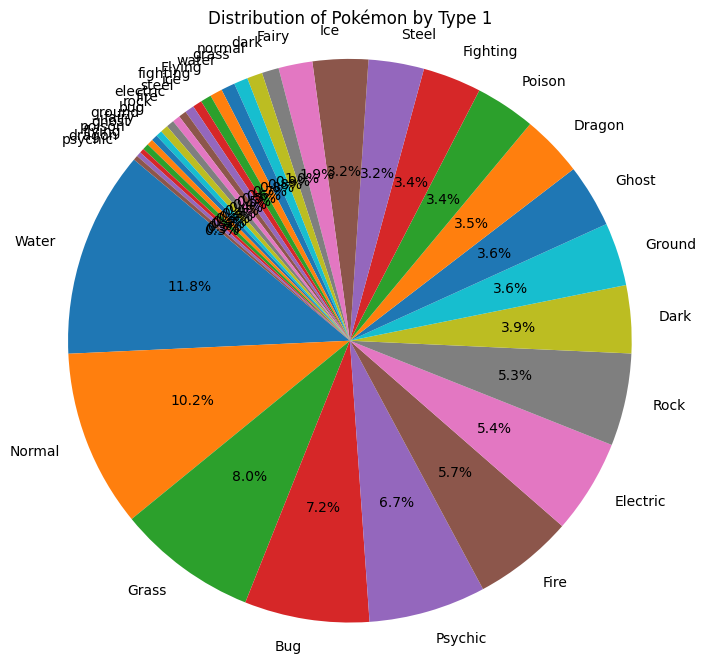

In [27]:
#Final visualizations

df = pd.read_csv('pokemon.csv', encoding='ISO-8859-1')
df_filled = df.fillna("None") 
type1_counts = df['Type 1'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Pokémon by Type 1')
plt.axis('equal')
plt.show()


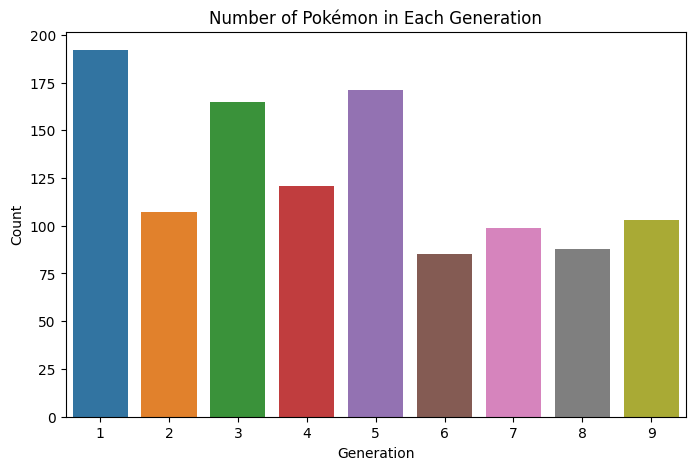

In [28]:
generation_counts = df['Generation'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=generation_counts.index, y=generation_counts.values)
plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Number of Pokémon in Each Generation')
plt.show()


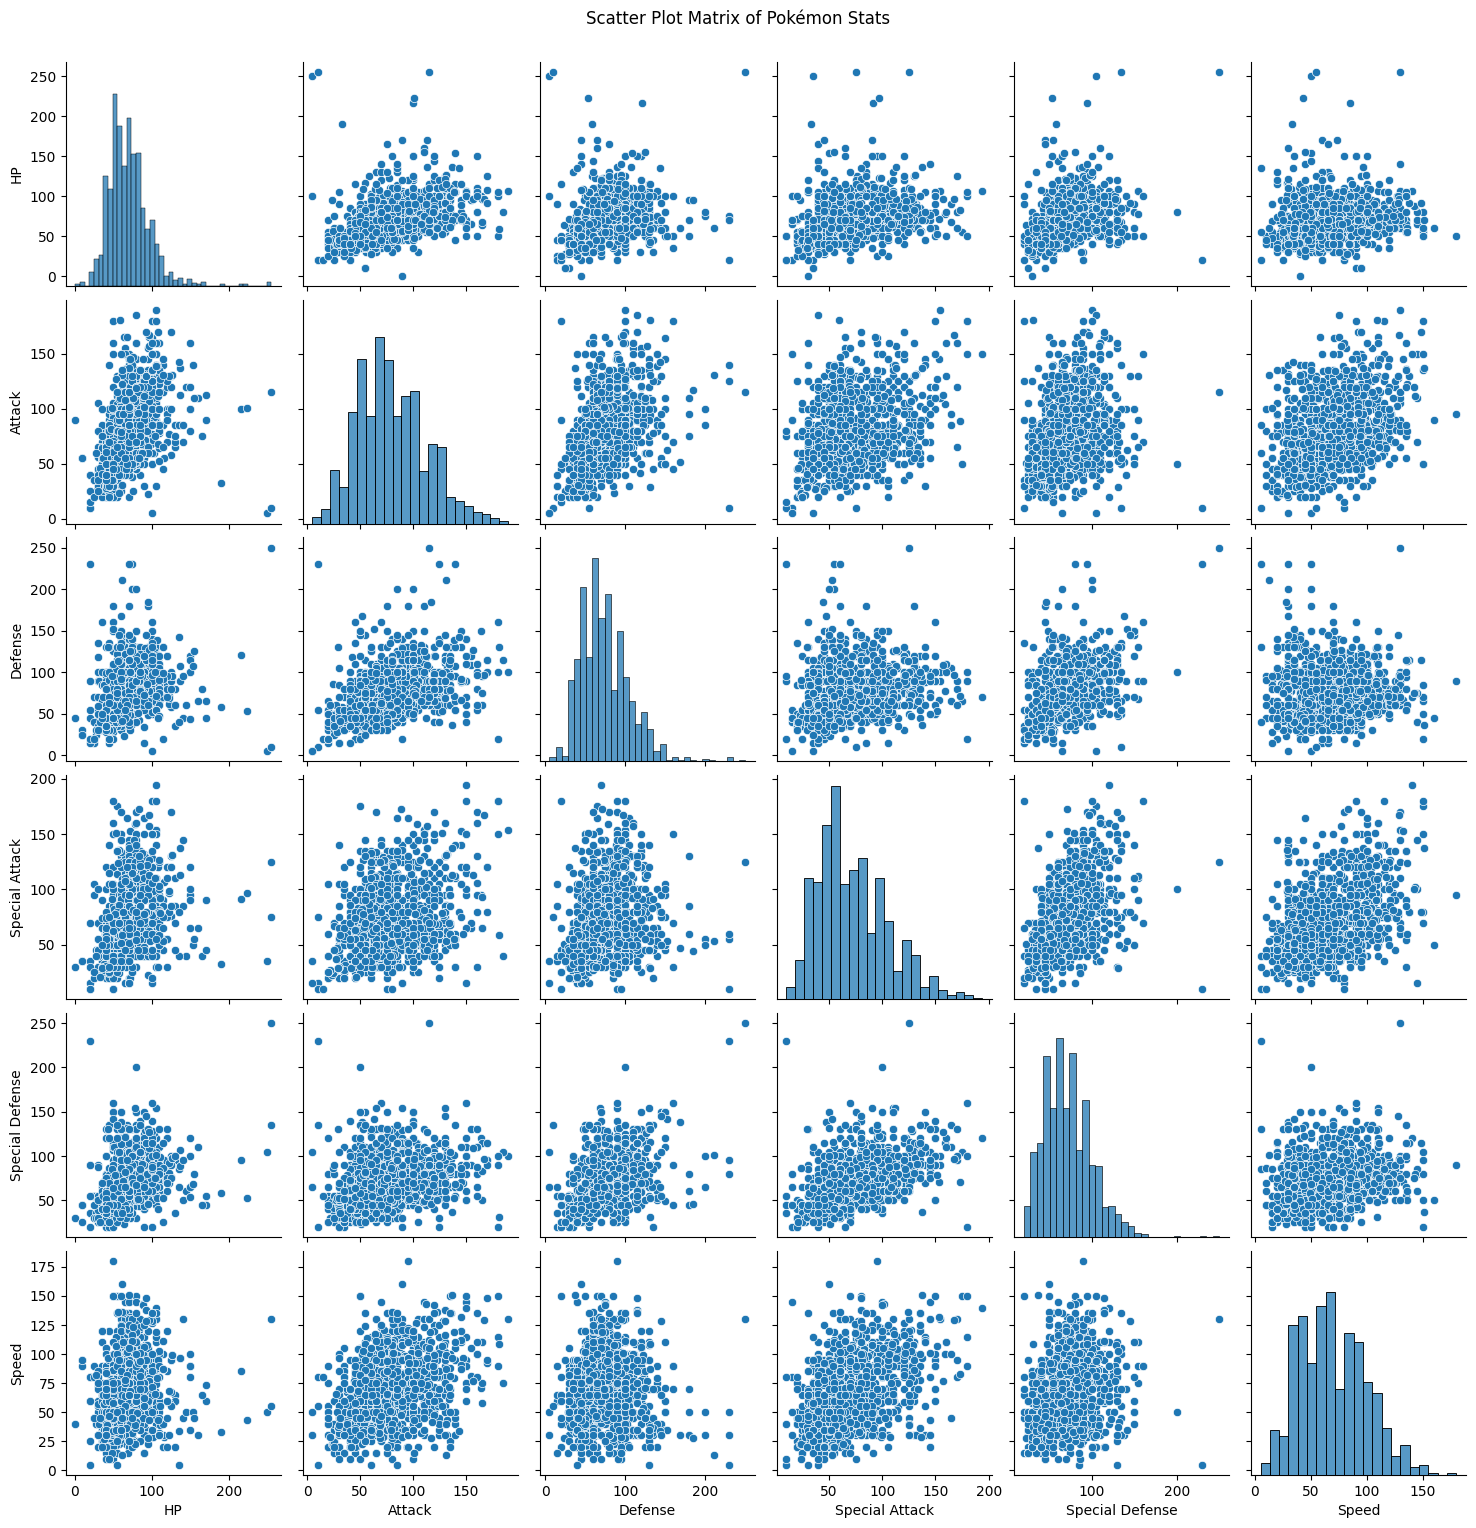

In [29]:
sns.pairplot(df[['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']])
plt.suptitle('Scatter Plot Matrix of Pokémon Stats', y=1.02)
plt.show()

In [34]:
#im gonna loose it
df["Type 2"].fillna("None", inplace=True)
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)  


Empty DataFrame
Columns: [Pokemon, Type 1, Type 2, HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation]
Index: []


In [36]:
df.to_csv('pokemon.csv', index=False, encoding='ISO-8859-1')
rows_with_null = df[df.isnull().any(axis=1)]
print(rows_with_null)  

Empty DataFrame
Columns: [Pokemon, Type 1, Type 2, HP, Attack, Defense, Special Attack, Special Defense, Speed, Generation]
Index: []


Models

Mean Squared Error: 502.27961260389145
R^2 Score: 0.42372253114554403


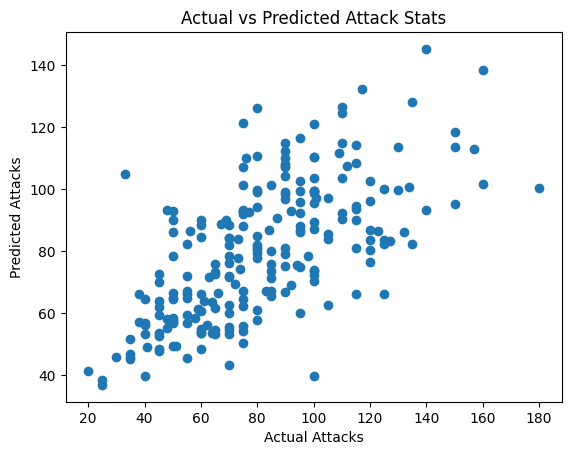

In [148]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


pokemon_data = pd.read_csv('pokemon.csv')

X = pokemon_data[['HP', 'Defense', 'Special Attack', 'Special Defense', 'Speed']]
y = pokemon_data['Attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Attacks')
plt.ylabel('Predicted Attacks')
plt.title('Actual vs Predicted Attack Stats')
plt.show()


Mean Squared Error: 463.7509854625551
R^2 Score: 0.4679273508720344


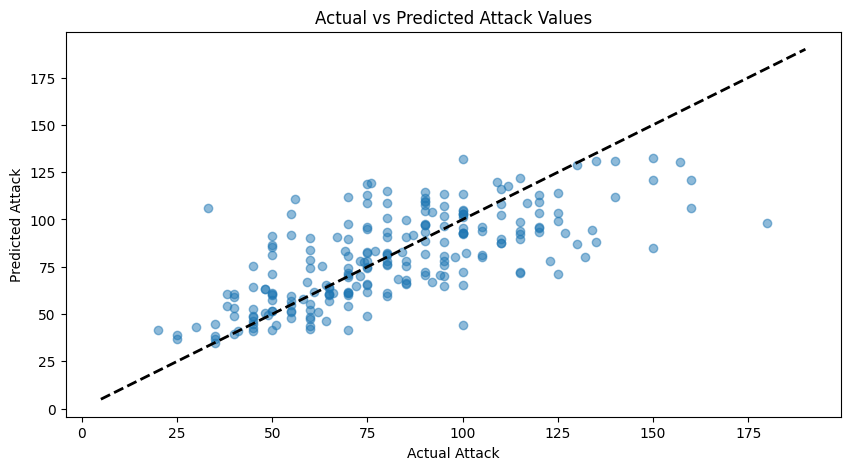

In [149]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pokemon_data = pd.read_csv('pokemon.csv')
X = pokemon_data[['HP', 'Defense', 'Special Attack', 'Special Defense', 'Speed', 'Type 1', 'Type 2']]
y = pokemon_data['Attack']

# One-hot encoding for categorical features
categorical_features = ['Type 1', 'Type 2']
numeric_features = ['HP', 'Defense', 'Special Attack', 'Special Defense', 'Speed']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', PolynomialFeatures(degree=2, include_bias=False), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Making a pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Attack')
plt.ylabel('Predicted Attack')
plt.title('Actual vs Predicted Attack Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  
plt.show()

Model Pt. 2

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

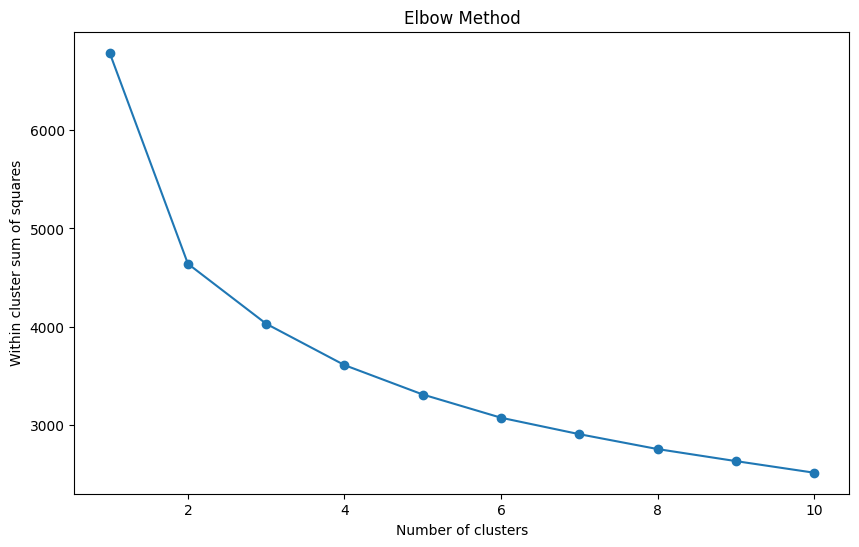

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

pokemon_data = pd.read_csv('pokemon.csv')

features = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
X = pokemon_data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') 
plt.show()

c:\Users\adamn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 1:
               HP      Attack     Defense  Special Attack  Special Defense   
count  639.000000  639.000000  639.000000      639.000000       639.000000  \
mean    83.405321   97.236307   89.469484       88.809077        86.888889   
std     25.646928   29.420296   29.263883       31.323439        25.066967   
min     20.000000    5.000000    5.000000       10.000000        20.000000   
25%     68.500000   75.000000   70.000000       65.000000        70.000000   
50%     80.000000   95.000000   85.000000       85.000000        85.000000   
75%     95.000000  118.500000  105.000000      109.500000       100.000000   
max    255.000000  190.000000  250.000000      194.000000       250.000000   

            Speed  Generation  Cluster  
count  639.000000  639.000000    639.0  
mean    80.793427    4.658842      0.0  
std     29.700826    2.569299      0.0  
min      5.000000    1.000000      0.0  
25%     60.000000    3.000000      0.0  
50%     82.000000    5.000000      0.0  

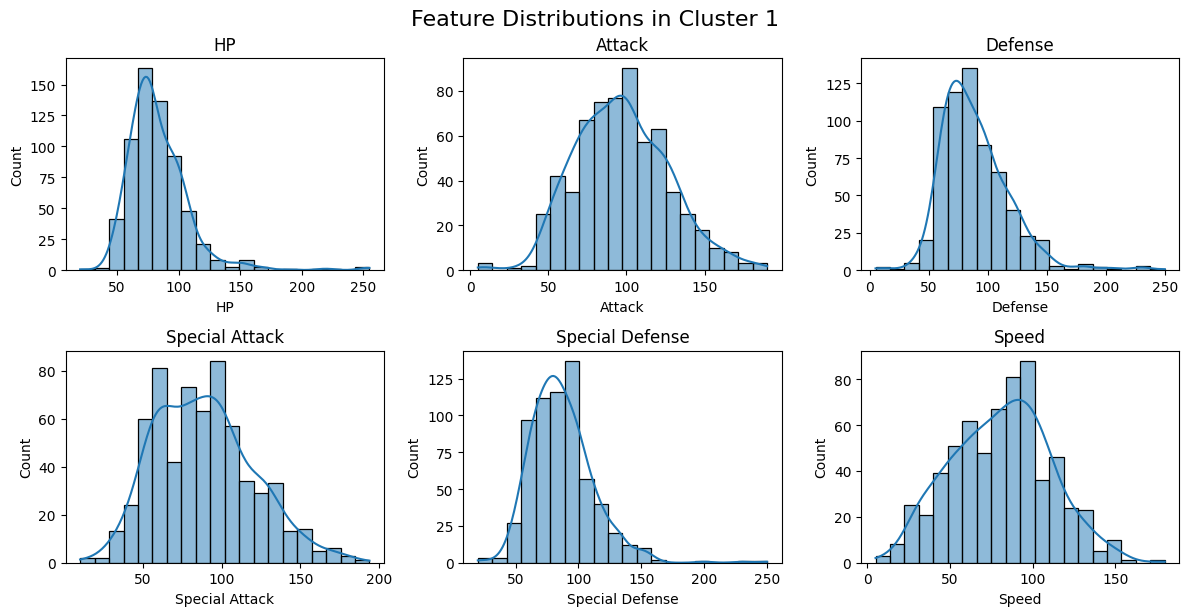

Cluster 2:
               HP      Attack     Defense  Special Attack  Special Defense   
count  492.000000  492.000000  492.000000      492.000000        492.00000  \
mean    52.863821   58.292683   54.806911       51.268293         52.50813   
std     16.080619   20.166206   20.112143       18.959523         17.08127   
min      1.000000    5.000000    5.000000       10.000000         20.00000   
25%     41.000000   45.000000   40.000000       40.000000         40.00000   
50%     50.000000   56.500000   50.000000       50.000000         50.00000   
75%     61.000000   71.250000   65.000000       63.000000         62.00000   
max    135.000000  125.000000  160.000000      125.000000        131.00000   

            Speed  Generation  Cluster  
count  492.000000  492.000000    492.0  
mean    53.754065    4.262195      1.0  
std     22.140969    2.546183      0.0  
min      5.000000    1.000000      1.0  
25%     36.750000    2.000000      1.0  
50%     50.000000    4.000000      1.0  

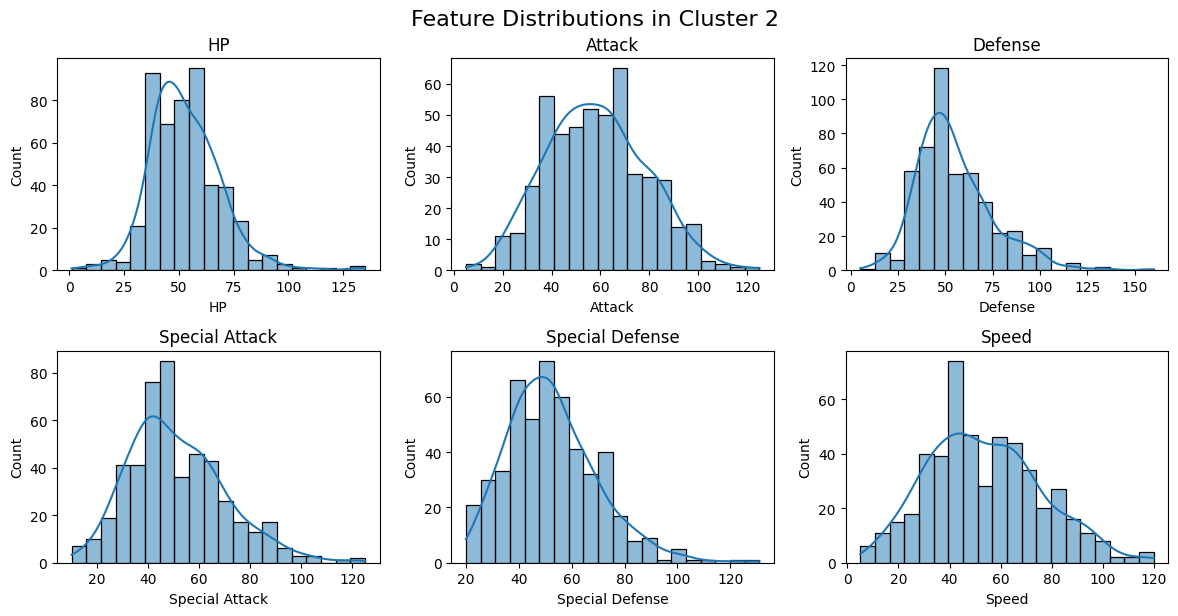

In [150]:
n_clusters = 2 
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
pokemon_data['Cluster'] = kmeans.fit_predict(X_scaled)
for i in range(2):
    cluster = pokemon_data[pokemon_data['Cluster'] == i]
    print(f"Cluster {i+1}:")
    print(cluster.describe())

    plt.figure(figsize=(12, 6))
    for j in range(len(features)):
        plt.subplot(2, 3, j+1)
        sns.histplot(cluster[features[j]], kde=True, bins=20)
        plt.title(features[j])
        
    plt.tight_layout()
    plt.suptitle(f'Feature Distributions in Cluster {i+1}', fontsize=16, y=1.02)
    plt.show()

Model pt. 3 

In [151]:
pokemon_data = pd.read_csv('pokemon.csv')

features = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
X = pokemon_data[features]
y = pokemon_data['Generation']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2422907488986784
Classification Report:
              precision    recall  f1-score   support

           1       0.39      0.69      0.50        39
           2       0.12      0.08      0.10        25
           3       0.27      0.16      0.20        43
           4       0.08      0.08      0.08        25
           5       0.19      0.33      0.24        27
           6       0.44      0.20      0.28        20
           7       0.14      0.05      0.07        22
           8       0.17      0.15      0.16        13
           9       0.07      0.08      0.07        13

    accuracy                           0.24       227
   macro avg       0.21      0.20      0.19       227
weighted avg       0.23      0.24      0.22       227



In [152]:
from xgboost import XGBClassifier

pokemon_data = pd.read_csv('pokemon.csv')

pokemon_data['Generation'] = pokemon_data['Generation'] - 1

features = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
X = pokemon_data[features]
y = pokemon_data['Generation']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.2026431718061674
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.51      0.42        39
           1       0.12      0.08      0.10        25
           2       0.27      0.19      0.22        43
           3       0.00      0.00      0.00        25
           4       0.19      0.30      0.23        27
           5       0.36      0.20      0.26        20
           6       0.09      0.05      0.06        22
           7       0.12      0.15      0.14        13
           8       0.05      0.08      0.06        13

    accuracy                           0.20       227
   macro avg       0.17      0.17      0.16       227
weighted avg       0.20      0.20      0.19       227



Accuracy: 0.31718061674008813
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.59      0.51        39
           1       0.00      0.00      0.00        25
           2       0.42      0.33      0.37        43
           3       0.14      0.12      0.13        25
           4       0.20      0.41      0.27        27
           5       0.27      0.15      0.19        20
           6       0.27      0.14      0.18        22
           7       0.15      0.15      0.15        13
           8       1.00      1.00      1.00        13

    accuracy                           0.32       227
   macro avg       0.32      0.32      0.31       227
weighted avg       0.31      0.32      0.30       227



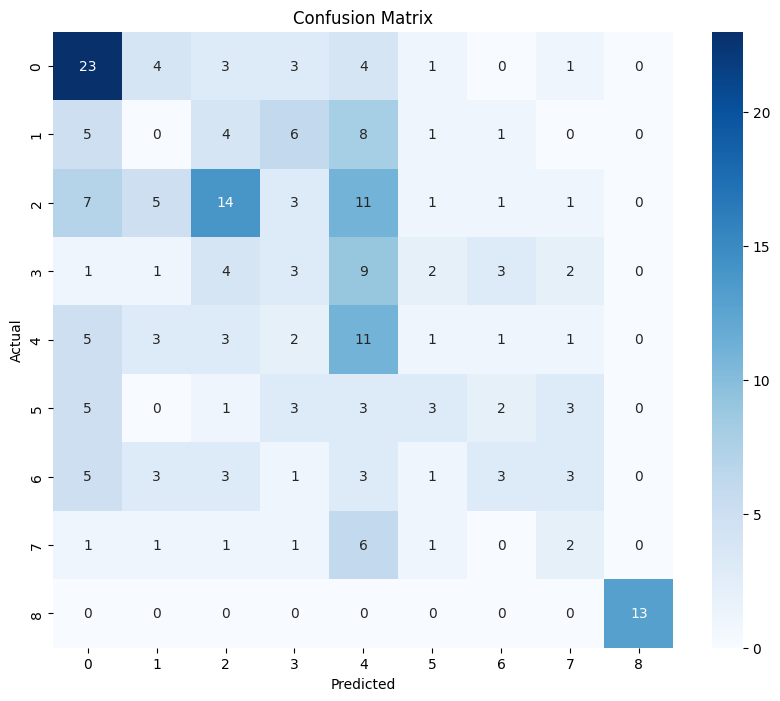

In [153]:
#oof

numeric_features = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
categorical_features = ['Type 1', 'Type 2']
X = pokemon_data[numeric_features + categorical_features]
y = pokemon_data['Generation']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)])
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', 
                      random_state=42, learning_rate=0.1, 
                      n_estimators=150, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
conf_mat = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Models pt. 4

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.67      0.80      0.73         5
           2       1.00      1.00      1.00       180
           3       0.90      0.82      0.86        11

    accuracy                           0.99       206
   macro avg       0.89      0.90      0.90       206
weighted avg       0.99      0.99      0.99       206



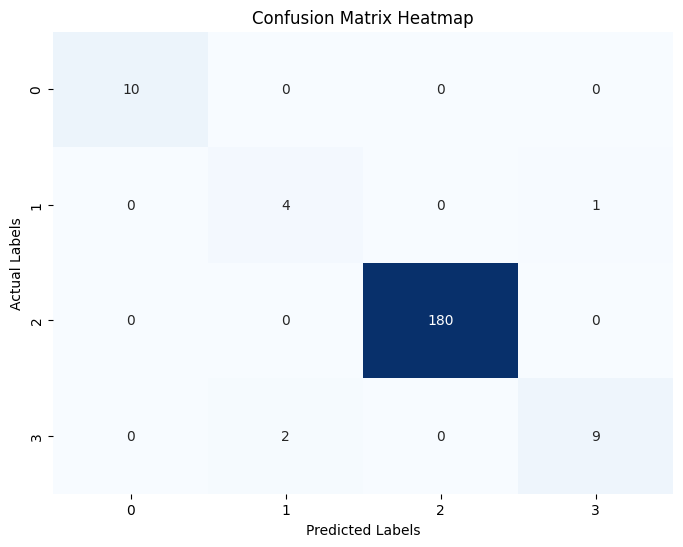

In [156]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd 
folder_path = "OGcsvs/"

pokedex_0520  = pd.read_csv(folder_path + 'pokedex_(Update_05.20).csv', encoding='ISO-8859-1')
pokedex_0520.drop(columns=['japanese_name', "Unnamed: 0", "german_name", "base_friendship", "ability_1", "ability_2", 
                 "ability_hidden", "abilities_number", "base_experience", "egg_type_number", "egg_type_1", 
                 "egg_type_2", "percentage_male", "egg_cycles", "species", "type_number", 'name'], inplace=True)
missing_values = pokedex_0520.isnull().sum()
pokedex_0520['type_2'].fillna('None', inplace=True)  
pokedex_0520['weight_kg'].fillna(pokedex_0520['weight_kg'].mean(), inplace=True)  
pokedex_0520['catch_rate'].fillna(pokedex_0520['catch_rate'].median(), inplace=True) 
pokedex_0520['growth_rate'].fillna(pokedex_0520['catch_rate'].mean(), inplace=True)

missing_values = pokedex_0520.isnull().sum()

label_encoder = LabelEncoder()
pokedex_0520['status_encoded'] = label_encoder.fit_transform(pokedex_0520['status'])
selected_features = ['total_points', 'catch_rate', 'weight_kg', 'height_m']
X = pokedex_0520[selected_features]  
y = pokedex_0520['status_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(classification_report(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()